In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV

from sklearn import svm

from support_functions import *

In [27]:
#Import data and give column names

train = pd.read_csv('../../data/feature_selected_train_FD001.csv', sep=',', header=0, engine='python')
test = pd.read_csv('../../data/feature_selected_test_FD001.csv', sep=',', header=0, engine='python')
y_test = pd.read_csv('../../data/RUL_FD001.csv', sep=',', header=0,  engine='python')

index_names = train.columns[[0, 1]]
setting_names = train.columns[[2]]
sensor_names = train.drop(index_names.union(setting_names), axis = 1).columns # Find something better than union!!
scale_columns = sensor_names
keep_columns = scale_columns.union(index_names[[1]])

In [28]:
x_train = add_remaining_useful_life(train)
y_train = x_train.pop('RUL')
x_test = test.groupby(by="unit_no").last().reset_index()
x_train_scaled, x_test_scaled = scale_data(x_train, x_test, scale_columns)

In [29]:
parameters = {'kernel': ('linear', 'rbf','poly'),
              'C':[1.5, 10],
              'gamma': [1e-7, 1e-4],
              'epsilon':[0.1,0.2,0.5,0.3]}

In [30]:
if False:
    reg_grid = svm.SVR()
    svm_grid = GridSearchCV(reg_grid, parameters, 
                            scoring = make_scorer(mean_squared_error, greater_is_better = False), 
                            verbose = 10).fit(x_train_scaled, y_train)
    svm_grid.best_params_

In [31]:
reg = svm.SVR(kernel = 'poly', gamma = 0.0001, C = 10, epsilon= 0.5)
reg.fit(x_train_scaled, y_train)
y_hat_train = reg.predict(x_train_scaled)
evaluate(y_train, y_hat_train, 'Train')

y_hat_test = reg.predict(x_test_scaled)
evaluate(y_test, y_hat_test, 'Test')

Train set RMSE:38.951113872679606, R2:0.6802120822951863
Test set RMSE:27.744628683468143, R2:0.5542428792634235


(27.744628683468143, 0.5542428792634235)

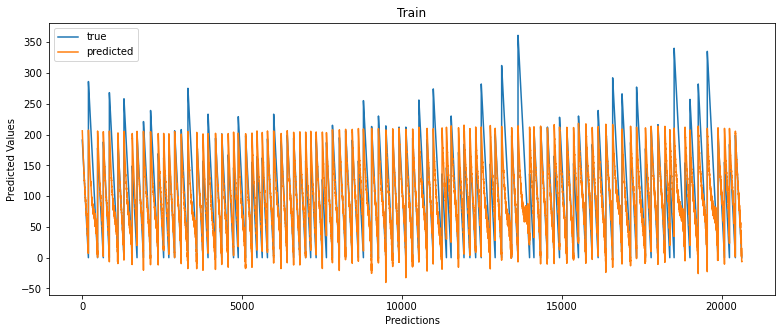

In [32]:
plot_predictions(y_train, y_hat_train)

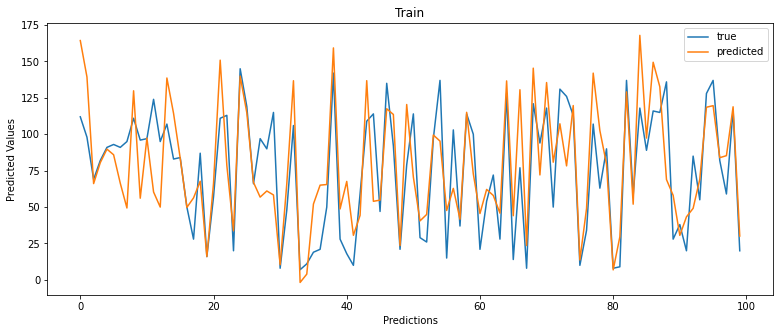

In [33]:
plot_predictions(y_test, y_hat_test)